In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


# MSE function
def MSE(h,y):
    n = int(y.shape[0]) 
    J = (1.0/(2.0*n))*np.sum(np.square(h-y))
    return J


# Regression model generation
def foward_propagation(thetas,X): 
    h = np.dot(thetas,X.T) 
    return h.T


# Calculations for partial differentiation of the Bias function
def back_propagation(X,y,h):
    n = int(y.shape[0])
    dhy = (1.0/n)*(h-y)
    dthetas = np.dot(dhy.T,X)
    return dthetas 


# update function for gradient descent
def gradient_descent_update(thetas,dthetas,learning_rate):
    thetas = thetas - learning_rate*dthetas
    return thetas


# update function for L1 regularized gradient descent
def gradient_descent_updateL1(thetas,dthetas,learning_rate,regularization_coefficient):
    m = thetas.shape[1]
    regularization_constant = np.true_divide(thetas, np.absolute(thetas))
    thetas = thetas - learning_rate*dthetas - (learning_rate*regularization_coefficient/m)*regularization_constant
    return thetas


# update function for L2 regularized descent
def gradient_descent_updateL2(thetas,dthetas,learning_rate,regularization_coefficient):
    m = thetas.shape[1]
    thetas = thetas*(-1*learning_rate*regularization_coefficient/m) - learning_rate*dthetas
    return thetas


# Initialize thetas with size of variables
def initalize_parameters(m):
    thetas = pd.DataFrame(np.random.randn(1,m)) # generate random variables with Z distribution
    return thetas


# Standardize data with Z value
def data_standardization(data):
    standardized_data = ((data - data.mean())/(data.std())).to_numpy()
    return standardized_data


# Regression Logics
def linear_regression_model(x_train,y_train,x_test,y_test,initial_thetas,learning_rate,epochs,regularization='None'):
    n_train = x_train.shape[0]
    n_test = x_test.shape[0]
    thetas = initial_thetas
    
    # Storage for graphing
    costs_train   = []
    costs_test    = []
    MAEs_train    = []
    MAEs_test     = []
    theta1_record = []
    theta2_record = []
    theta3_record = []
    theta4_record = []
    theta5_record = []
    theta6_record = []
    theta7_record = []
    theta8_record = []
    theta9_record = []
    thetaA_record = []
    thetaB_record = []
    thetaC_record = []
    thetaD_record = []
    thetaE_record = []
    thetaF_record = []    
    
    for i in range(1,epochs+1):
        # Calculate h(x) 
        h_train = foward_propagation(thetas,x_train)
        
        # Calculate Bias of h(x)
        cost_train = MSE(h_train,y_train)
        
        # calculate MAE of h(x) during training
        MAE_train = (1.0/n_train)*np.sum(np.abs(h_train-y_train))
        
        # Evaluating model using new dataset
        h_test =  foward_propagation(thetas,x_test)
        
        # Calculating Variance of h(x) 
        cost_test = MSE(h_test,y_test)
        
        # Calculating MAE of h(x) during evaluation
        MAE_test = (1.0/n_test)*np.sum(np.abs(h_test-y_test))
        
        # Store variables
        costs_train   = np.append(costs_train, cost_train)
        costs_test    = np.append(costs_test, cost_test)
        MAEs_train    = np.append(MAEs_train, MAE_train)
        MAEs_test     = np.append(MAEs_test, MAE_test)
        theta1_record = np.append(theta1_record, thetas[0])
        theta2_record = np.append(theta2_record, thetas[1])
        theta3_record = np.append(theta3_record, thetas[2])
        theta4_record = np.append(theta4_record, thetas[3])
        theta5_record = np.append(theta5_record, thetas[4])
        theta6_record = np.append(theta6_record, thetas[5])
        theta7_record = np.append(theta7_record, thetas[6])
        theta8_record = np.append(theta8_record, thetas[7])
        theta9_record = np.append(theta9_record, thetas[8])
        thetaA_record = np.append(thetaA_record, thetas[9])
        thetaB_record = np.append(thetaB_record, thetas[10])
        thetaC_record = np.append(thetaC_record, thetas[11])
        thetaD_record = np.append(thetaD_record, thetas[12])
        thetaE_record = np.append(thetaE_record, thetas[13])
        thetaF_record = np.append(thetaF_record, thetas[14])

        # Calculate partial differentiation of the Cost function
        dthetas = back_propagation(x_train, y_train, h_train)

        # Update Gradient Descent according to regularization method
        if regularization == 'L1':
            thetas = gradient_descent_updateL1(thetas, dthetas, learning_rate, 0.2)
        elif regularization == 'L2':
            thetas = gradient_descent_updateL2(thetas, dthetas, learning_rate, 0.2)
        else:
            thetas = gradient_descent_update(thetas, dthetas, learning_rate)
    
    # Zip theta records into an array
    thetas_record = [theta1_record, theta2_record, theta3_record, theta4_record, theta5_record,
                     theta6_record, theta7_record, theta8_record, theta9_record, thetaA_record,
                     thetaB_record, thetaC_record, thetaD_record, thetaE_record, thetaF_record]
    
    # return stored variables
    return costs_train, MAEs_train, costs_test, MAEs_test, thetas_record

In [2]:
# Parse Data
data_train_X = data_standardization(pd.DataFrame(np.genfromtxt('train_X.csv', delimiter = ',')))
data_train_Y = data_standardization(pd.DataFrame(np.genfromtxt('train_Y.csv', delimiter = ',')))
data_eval_X  = data_standardization(pd.DataFrame(np.genfromtxt('eval_X.csv', delimiter = ',')))
data_eval_Y  = data_standardization(pd.DataFrame(np.genfromtxt('eval_Y.csv', delimiter = ',')))
initial_thetas = initalize_parameters(data_train_X.shape[1]) # generate random values for weight and bias

In [3]:
# Run Unregularized model training
costs_train, MAEs_train,costs_test, MAEs_test,thetas_record = linear_regression_model(data_train_X, data_train_Y, data_eval_X, data_eval_Y, initial_thetas, 0.1, 100)

In [4]:
# Run L1 Regularized model training
costs_train_L1, MAEs_train_L1, costs_test_L1, MAEs_test_L1, thetas_record_L1 = linear_regression_model(data_train_X, data_train_Y, data_eval_X, data_eval_Y, initial_thetas, 0.1, 100, 'L1')

In [5]:
# Run L2 Regularized model training
costs_train_L2, MAEs_train_L2, costs_test_L2, MAEs_test_L2, thetas_record_L2 = linear_regression_model(data_train_X, data_train_Y, data_eval_X, data_eval_Y, initial_thetas, 0.1, 100, 'L2')

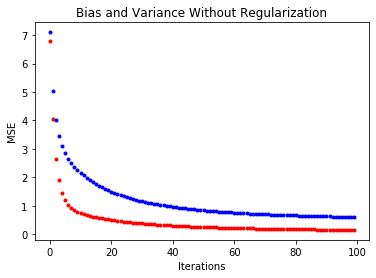

In [6]:
plt.plot(costs_train,'r.')
plt.plot(costs_test,'b.')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Bias and Variance Without Regularization')
plt.show()

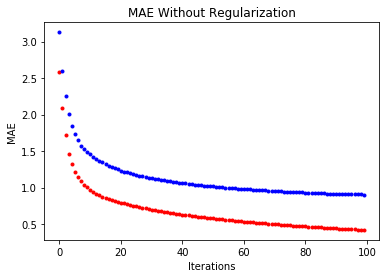

In [7]:
plt.plot(MAEs_train,'r.')
plt.plot(MAEs_test,'b.')
plt.xlabel('Iterations')
plt.ylabel('MAE')
plt.title('MAE Without Regularization')
plt.show()

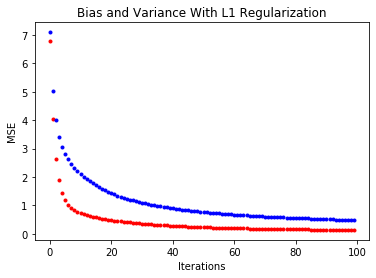

In [8]:
plt.plot(costs_train_L1,'r.')
plt.plot(costs_test_L1,'b.')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Bias and Variance With L1 Regularization')
plt.show()

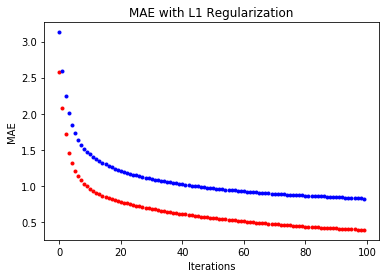

In [9]:
plt.plot(MAEs_train_L1,'r.')
plt.plot(MAEs_test_L1,'b.')
plt.xlabel('Iterations')
plt.ylabel('MAE')
plt.title('MAE with L1 Regularization')
plt.show()

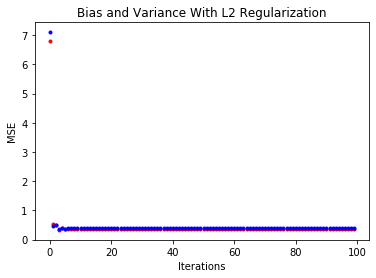

In [10]:
plt.plot(costs_train_L2,'r.')
plt.plot(costs_test_L2,'b.')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Bias and Variance With L2 Regularization')
plt.show()

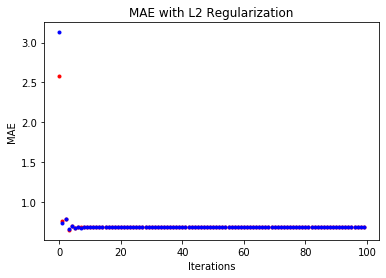

In [11]:
plt.plot(MAEs_train_L2,'r.')
plt.plot(MAEs_test_L2,'b.')
plt.xlabel('Iterations')
plt.ylabel('MAE')
plt.title('MAE with L2 Regularization')
plt.show()

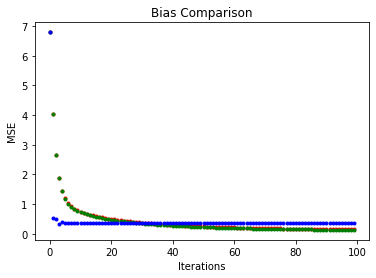

In [12]:
plt.plot(costs_train,'r.')
plt.plot(costs_train_L1,'g.')
plt.plot(costs_train_L2,'b.')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Bias Comparison')
plt.show()

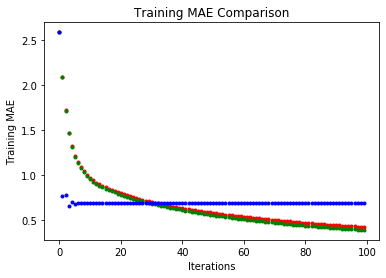

In [13]:
plt.plot(MAEs_train,'r.')
plt.plot(MAEs_train_L1,'g.')
plt.plot(MAEs_train_L2,'b.')
plt.xlabel('Iterations')
plt.ylabel('Training MAE')
plt.title('Training MAE Comparison')
plt.show()

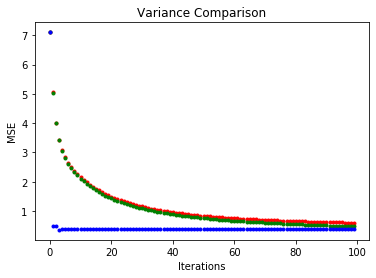

In [14]:
plt.plot(costs_test,'r.')
plt.plot(costs_test_L1,'g.')
plt.plot(costs_test_L2,'b.')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Variance Comparison')
plt.show()

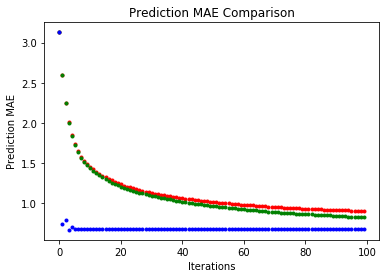

In [15]:
plt.plot(MAEs_test,'r.')
plt.plot(MAEs_test_L1,'g.')
plt.plot(MAEs_test_L2,'b.')
plt.xlabel('Iterations')
plt.ylabel('Prediction MAE')
plt.title('Prediction MAE Comparison')
plt.show()

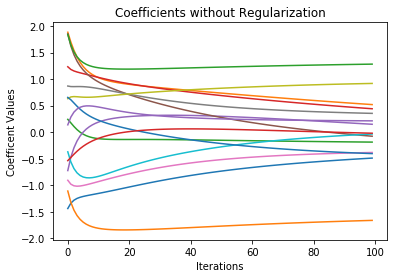

In [16]:
plt.plot(thetas_record[0],'C0-')
plt.plot(thetas_record[1],'C1-')
plt.plot(thetas_record[2],'C2-')
plt.plot(thetas_record[3],'C3-')
plt.plot(thetas_record[4],'C4-')
plt.plot(thetas_record[5],'C5-')
plt.plot(thetas_record[6],'C6-')
plt.plot(thetas_record[7],'C7-')
plt.plot(thetas_record[8],'C8-')
plt.plot(thetas_record[9],'C9-')
plt.plot(thetas_record[10],'C0-')
plt.plot(thetas_record[11],'C1-')
plt.plot(thetas_record[12],'C2-')
plt.plot(thetas_record[13],'C3-')
plt.plot(thetas_record[14],'C4-')
plt.xlabel('Iterations')
plt.ylabel('Coefficent Values')
plt.title('Coefficients without Regularization')
plt.show()

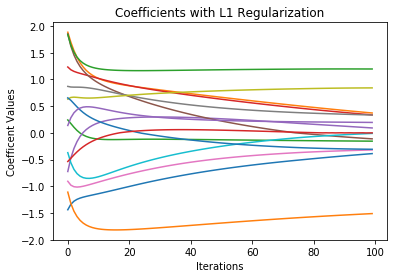

In [17]:
plt.plot(thetas_record_L1[0],'C0-')
plt.plot(thetas_record_L1[1],'C1-')
plt.plot(thetas_record_L1[2],'C2-')
plt.plot(thetas_record_L1[3],'C3-')
plt.plot(thetas_record_L1[4],'C4-')
plt.plot(thetas_record_L1[5],'C5-')
plt.plot(thetas_record_L1[6],'C6-')
plt.plot(thetas_record_L1[7],'C7-')
plt.plot(thetas_record_L1[8],'C8-')
plt.plot(thetas_record_L1[9],'C9-')
plt.plot(thetas_record_L1[10],'C0-')
plt.plot(thetas_record_L1[11],'C1-')
plt.plot(thetas_record_L1[12],'C2-')
plt.plot(thetas_record_L1[13],'C3-')
plt.plot(thetas_record_L1[14],'C4-')
plt.xlabel('Iterations')
plt.ylabel('Coefficent Values')
plt.title('Coefficients with L1 Regularization')
plt.show()

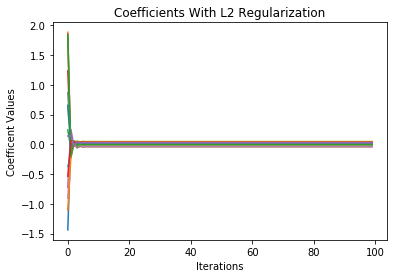

In [18]:
plt.plot(thetas_record_L2[0],'C0-')
plt.plot(thetas_record_L2[1],'C1-')
plt.plot(thetas_record_L2[2],'C2-')
plt.plot(thetas_record_L2[3],'C3-')
plt.plot(thetas_record_L2[4],'C4-')
plt.plot(thetas_record_L2[5],'C5-')
plt.plot(thetas_record_L2[6],'C6-')
plt.plot(thetas_record_L2[7],'C7-')
plt.plot(thetas_record_L2[8],'C8-')
plt.plot(thetas_record_L2[9],'C9-')
plt.plot(thetas_record_L2[10],'C0-')
plt.plot(thetas_record_L2[11],'C1-')
plt.plot(thetas_record_L2[12],'C2-')
plt.plot(thetas_record_L2[13],'C3-')
plt.plot(thetas_record_L2[14],'C4-')
plt.xlabel('Iterations')
plt.ylabel('Coefficent Values')
plt.title('Coefficients With L2 Regularization')
plt.show()